# Day_01 - Julia in the Jupyter notebook

## Getting Conda and Julia to meet
I reinstalled Julia via 

`pacman -Syu julia`, 

then created a conda environment to build a clean Jupyter notebook.

1. `conda create -n julia`
2. `conda activate julia`
3. `conda install jupyterlab`

Then, I had to rebuild the `IJulia` package:

`]build("IJulia")`

Now, I'm up and running in the Jupyter notebook. Pretty cool so far.

## Playing with some vector math and notation

In [1]:
x = [1, 2, 3];

It looks like Julia suppresses output with the `;` like Matlab.

In [2]:
print(transpose(x));

[1 2 3]

This was an interesting choice here. The default shape for a vector is 1D, e.g. `(N, )`, but you need to do a tranpose to multiply vectors either dot product or outer product

In [3]:
print(x*transpose(x))
print('\n',transpose(x)*x)

[1 2 3; 2 4 6; 3 6 9]
14

The result is that the 1D vector has an implicit second dimension. This is like Matlab. A `(3, )` vectors is really treated as a `(3, 1)` column vector. 

There are some cool Linear Algebra things I might be able to build with this kind of framework.

In [4]:
print("size(x) = ", size(x))
print("\nsize(transpose(x)) = ", size(transpose(x)))

size(x) = (3,)
size(transpose(x)) = (1, 3)

## Plotting _first time to plot_

Man, I really thought I messed something up with my first plot. It was taking forever. Then, I tried it in the REPL and same thing. Then, I found the [first time to plot](https://news.ycombinator.com/item?id=26133230) (issue?). It seems that getting the Julia environment ready to display data takes some computational work.

In [5]:
using Plots

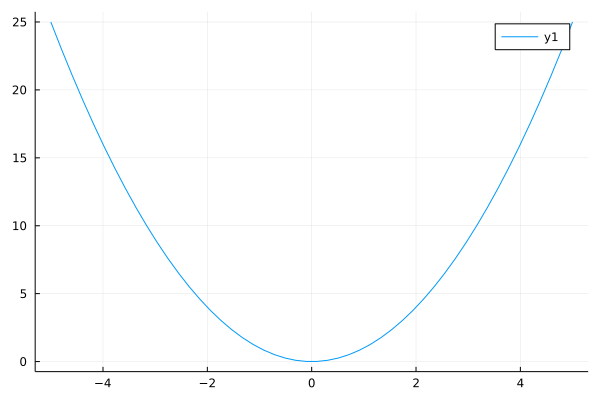

In [6]:
x = range(-5, 5, length = 50)
y = x.^2
plot(x, y)

In Matplotlib, the more plots you add, the more lines you have. Here it looks like the lines get overwritten _more like Matlab_. Ah, but adding a `plot!` adds the lines to the current plot.

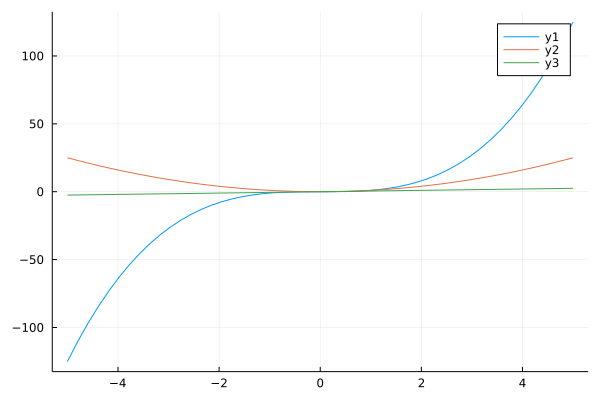

In [7]:
plot(x, x.^3)
plot!(x, x.^2)
plot!(x, 1/2*x)

## Animated plots + help with functions

I found this awesome animated gif of a sine+cosine moving camera+tracking line. There were a bunch of plot calls, but one function stood out, `@gif`. I hadn't seen a MATLAB/Python equivalent so I ran the code to get the gif. _Success_.

In [ ]:
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

A couple things stood out in the example I found. 
1. Multiplication was implied, e.g. `2pi` and `10sin`. I don't know if can bring myself to write code this way, but it would help avoid _a lot_ of first-time programmer errors. 
2. The `linspace` equivalent is just `range(start, stop, length = <>)`. This is nice because it can be taxing to jump back-and-forth between `range` and `linspace`. 
2. Anonymous functions are so straight-forward: `f(x, y) =...` creates a 2-input function. It feels so natural and lovely. 
3. The `@gif` function appears to be do some sort of magic. There's an iterator `i` that goes from $0-2\pi$ and I'm guessing it grabs whatever plots are defined inside the loop and squishing them into one glorious gif. 

Time to check the docs. This took me a couple tries, but I found the [Accessing documentation](https://docs.julialang.org/en/v1/manual/documentation/#Accessing-Documentation) on docs.julialang.org.

In [ ]:
?@gif

Cool! Check out the example given

In [ ]:
p = plot(1)
@gif for x=0:0.1:4pi
push!(p, 1, sin(x))
end

In [ ]:
?push!

## Wrapping up

Great second day of Julia work. I'm interested to dive into the objects and functions `plot` and `push`. They are so useful, but I don't really understand how they speak to each other right now. That `@gif` function would be **so** useful in MATLAB/Matplotlib. Its such an intuitive way to create an animation that is easy to share and display.